# Les Algorithmes de Classification Non Supervisé

Dans ce Jupyter NoteBook nous allons vous présenter 3 algorithmes de classification non supervisé, le premier algorithme va être l'algorithme par propagation par affinité, le deuxième va être l'algorithme K-Means et le troisième qu'on va vous présenter va être l'algorithme BIRCH.

---

## 1. Propagation par affinité (Affinity Propagation)
#### Author : O.GS

Dans cet exemple nous allons essayez de vous presenter l'algorithme d'Affinity Propagation pour cela on a choisi un exemple avec un datasets de Blobs. Le Blob est un organisme uni-cellulaire qui fascine les scientifiques via c'est prouesse en nottament en trouvant le chemin le plus court lorsqu'il est placé dans un labyrinthe.

Donc dans cet exemple on va essayer de créer des affinités parmi des Blobs generées aléatoirement.

### Etape 1 : Importer les dépendances

Ici nous avons utilisé sklearn pour y prendre metrics, AffinityPropagation et le datasets qui permet de créer des Blobs. Nous avons egalement utilisé matplotlib pour afficher notre graphe sur les affinités entre blobs.

In [26]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#### Etape 2 : Nous avons créer nos Blobs
On choisi le nombre d'échantillon via l'argument n_samples passé dans make_blobs. Ici on va en créer 250.

In [33]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=250, centers=centers, cluster_std=0.5, random_state=1
)

### Etape 3 : Nous allons essayer de trouver des clusters via les afffinité entre échantillon (Blobs)

In [40]:
af = AffinityPropagation(preference=-5, random_state=1).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 9
Homogeneity: 0.874
Completeness: 0.453
V-measure: 0.597
Adjusted Rand Index: 0.409
Adjusted Mutual Information: 0.588
Silhouette Coefficient: 0.493


### Etape 4 : Nous allons maintenant affiché le graphes avec les clusters et le lien entre eux.
Pour cela nous allons utilisé la bibliotheque matplotlib.

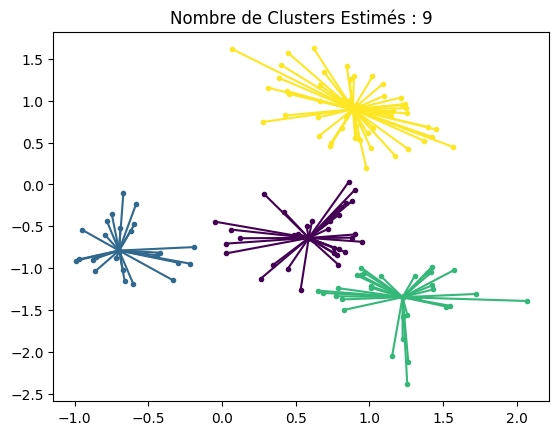

In [44]:
plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Nombre de Clusters Estimés : %d" % n_clusters_)
plt.show()

---

## 2. K-Means

#### Author : rian

In [47]:
#!pip install --force-reinstall -v "numpy==1.24.0"
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_openml

In [51]:
sizeSample = 1_000
dataRaw =fetch_openml(data_id=43750,return_X_y=True)
data = dataRaw[0][:sizeSample]

In [53]:
data = pd.DataFrame(data)
print("n_sample=",data.shape[0])
print("n_feature=",len(data.columns))
data

n_sample= 214
n_feature= 10


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


On enlève le Type puisque c'est non-supervisé et c'est l'étiquette

In [54]:
X = data.drop(columns=['Type'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

On applique le K-Moyen

In [55]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


et on cherche les centres des clusters

In [56]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)


et on plot

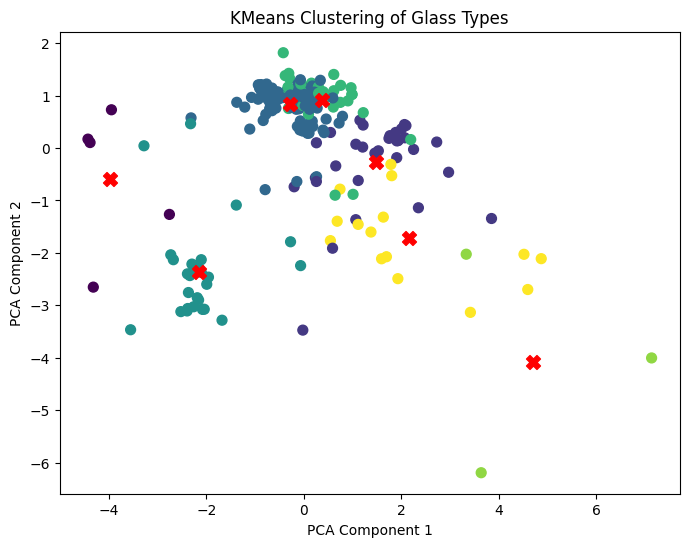

Cluster  0   1   2   3   4  5  6
Type                            
1.0      0  20  39   0  11  0  0
2.0      0   4  44   0  18  3  7
3.0      0   2  12   0   3  0  0
5.0      3   0   2   0   1  0  7
6.0      0   3   1   4   0  0  1
7.0      2   3   1  23   0  0  0


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Cluster
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0,2
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0,2
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0,2
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0,3
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0,3
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0,3
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0,3


In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, label="Data Points")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=100, marker='X', label="Centroids")
plt.title('KMeans Clustering of Glass Types')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Compare the predicted clusters with the actual glass types
data.loc[:, 'Cluster'] = labels
print(pd.crosstab(data['Type'], data['Cluster']))
data

---

## 3. Birch

#### Author : delecons

BIRCH without global clustering as the final step took 0.39 seconds
n_clusters : 363
BIRCH with global clustering as the final step took 0.43 seconds
n_clusters : 100


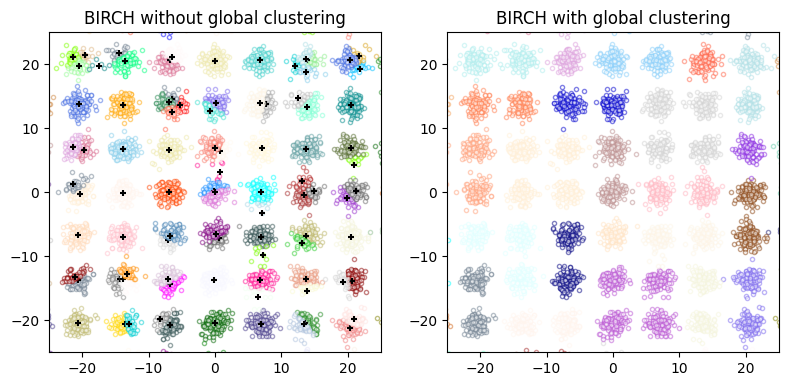

"\nOn peut voir que dans les executions a repetition, le BIRCH with global clustering garde les groupe de couleur ensemble, plus le int n_cluster\nest bas moins les tas des couleurs sont mélangé.\nSans global clustering les couleurs se mélanges et sont repérée par l'algorhitme.\n"

In [46]:
from itertools import cycle
from time import time

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
from joblib import cpu_count

from sklearn.cluster import Birch
from sklearn.datasets import make_blobs

#valeurs random pour avoir des valeurs qui change
tailleTotal = np.random.randint(10, 100)
tailleTotalNegatif = tailleTotal * (-1)
tailleGrid = np.random.randint(10, 20)

#on initialise la taille des clusters
xx = np.linspace(tailleTotalNegatif, tailleTotal, tailleGrid)
yy = np.linspace(tailleTotalNegatif, tailleTotal, tailleGrid)
xx, yy = np.meshgrid(xx, yy)
n_centers = np.hstack((np.ravel(xx)[:, np.newaxis], np.ravel(yy)[:, np.newaxis]))

#on crée les samples
X, y = make_blobs(n_samples=25000, centers=n_centers, random_state=0)

colors_ = cycle(colors.cnames.keys())

fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.9)

#Crée les mondels ou les clusters
birch_models = [
    Birch(threshold=1.7, n_clusters=None),
    Birch(threshold=1.7, n_clusters=100),
]
final_step = ["without global clustering", "with global clustering"]

#le for qui permet de crée les BIRCH
for ind, (birch_model, info) in enumerate(zip(birch_models, final_step)):
    t = time()
    birch_model.fit(X)
    print("BIRCH %s as the final step took %0.2f seconds" % (info, (time() - t)))

    #cette partie donne un nom pour les graph BIRCH
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = np.unique(labels).size
    print("n_clusters : %d" % n_clusters)

    #cette partie crée les graphs pour montrer les tri fait par BIRCH
    ax = fig.add_subplot(1, 3, ind + 1)
    for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        ax.scatter(X[mask, 0], X[mask, 1], c="w", edgecolor=col, marker=".", alpha=0.5)
        if birch_model.n_clusters is None:
            ax.scatter(this_centroid[0], this_centroid[1], marker="+", c="k", s=25)
    ax.set_ylim([-25, 25])
    ax.set_xlim([-25, 25])
    ax.set_autoscaley_on(False)
    ax.set_title("BIRCH %s" % info)

plt.show()

"""
On peut voir que dans les executions a repetition, le BIRCH with global clustering garde les groupe de couleur ensemble, plus le int n_cluster
est bas moins les tas des couleurs sont mélangé.
Sans global clustering les couleurs se mélanges et sont repérée par l'algorhitme.
"""